## In Class Project - Venkatasai Ancha

### completing pipeline by using BGR2RGB function and RGB2HSV function.

In [76]:
# Importing libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt


In [77]:
# importing image
bgrImg = cv2.imread("/Users/venkatasaiancha/Documents/sem 2/image processing/photos/gadot.jpeg")

h = bgrImg.shape[0]
w = bgrImg.shape[1]
d = bgrImg.shape[2]

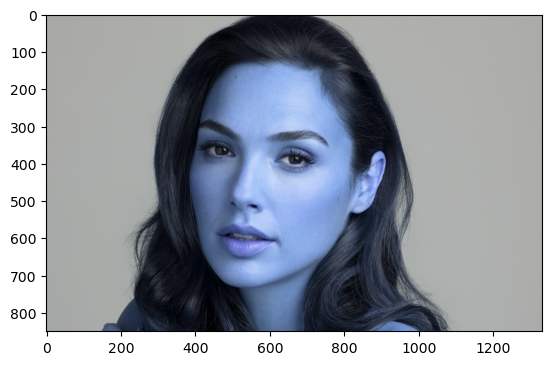

In [78]:
#ploting Original BGR image
plt.imshow(bgrImg)

In [79]:
# height, width and depth of original image
print(h,w,d)

850 1332 3


In [80]:
# Image after reshape
bgrImg = cv2.resize(bgrImg, None, fx= 0.5, fy= 0.5, interpolation= cv2.INTER_LINEAR)

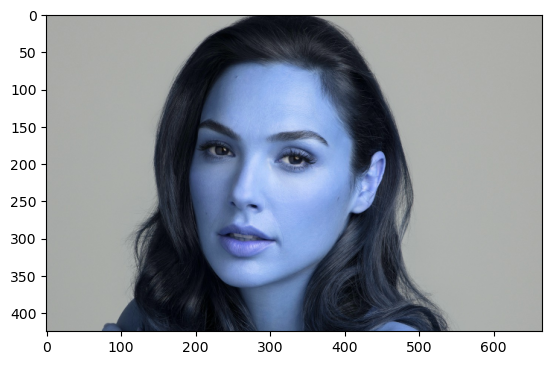

In [81]:
# plotting image after using reshape
plt.imshow(bgrImg)

In [82]:
# height, width and depth of reshaped image.
h = bgrImg.shape[0]
w = bgrImg.shape[1]
d = bgrImg.shape[2]

In [83]:
# function to convert BGR image to RGB image.
def bgr_to_rgb(bgr):
    bgr = np.array(bgr)
    b = bgr[0][0][0]
    g = bgr[0][0][1]
    r = bgr[0][0][2]
    
    rgb = np.uint8([[[r,g,b]]])
    return rgb

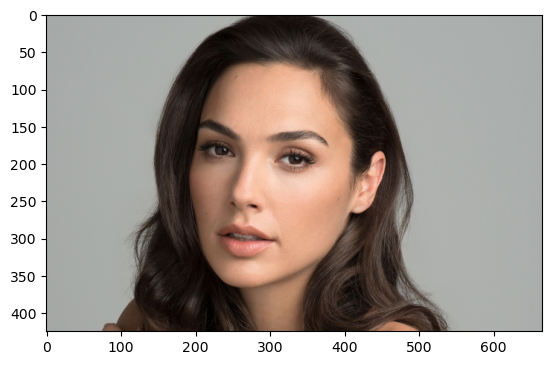

In [84]:
# calling BGR to RGB function and plotting RGB image.
rgbImg = copy.deepcopy(bgrImg)
for y in range(0,h):
    for x in range(0,w):
        
        pixel = bgrImg[y][x]
        rgbImg[y][x] = bgr_to_rgb([[pixel]])

plt.imshow(rgbImg)

In [85]:
# function to convert RGB image to HSV image
def rgb_to_hsv(rgb):
    
    rgb = np.array(rgb)/255
    
    r = rgb[0][0][0]
    g = rgb[0][0][1]
    b = rgb[0][0][2]
    
    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)
    
    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)
    
    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(r == g and g == b):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(r == v):
        h = 60 * (g - b) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(g == v):
        h = 120 + 60 * (b - r) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(b == v):
        h = 240 + 60 * (r - g) / diff
    
    # Convert to OpenCv ranges
    s = np.interp(s,[0,1],[0,255])
    v = np.interp(v,[0,1],[0,255])
    h = h/2
    # Storing h,s,v values in hsv array
    hsv = np.uint8([[[round(h),round(s),round(v)]]])
    # Return hsv array.
    return hsv

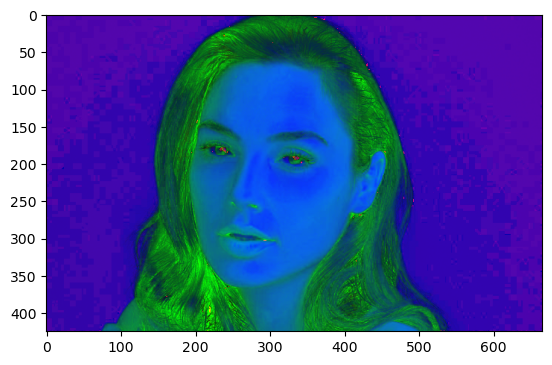

In [86]:
# calling RGB to HSV image and plotting HSV image
hsvImg = copy.deepcopy(rgbImg)
for y in range(0,h):
    for x in range(0,w):
        
        pixel = rgbImg[y][x]
        hsvImg[y][x] = rgb_to_hsv([[pixel]])

plt.imshow(hsvImg)

In [87]:
# initialising values to draw rectangle on RGB image
top_left = (195, 75)
bottom_right = (400,370)

rect_color = (255,0,0)
thickness = 5

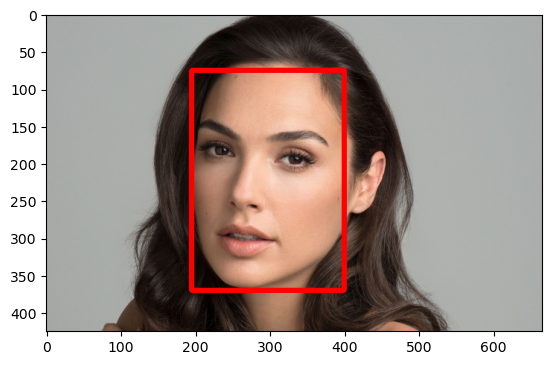

In [88]:
# plotting rectangle on image using opencv rectangle function.
img_rect = cv2.rectangle(rgbImg, top_left, bottom_right, rect_color, thickness)

plt.imshow(img_rect)

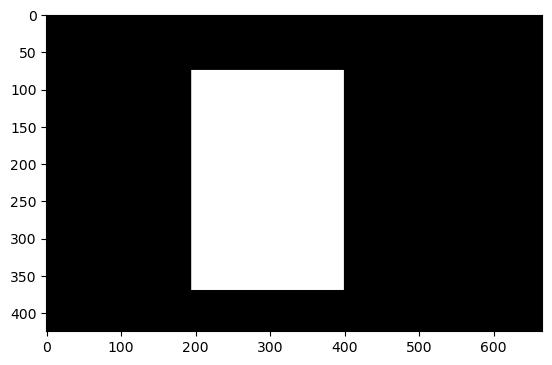

In [89]:
# creating an numpy array with zeros and plotting the mask in grayscale.
mask = np.zeros(rgbImg.shape[:2], np.uint8)

mask[75:370, 195:400] = 255

plt.imshow(mask, cmap="gray")

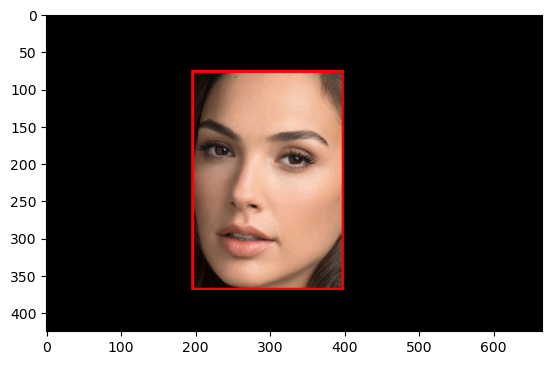

In [90]:
# combining RGB image and mask using bitwise_and function and plotting masked image.
img_masked = cv2.bitwise_and(rgbImg, rgbImg, mask = mask)

plt.imshow(img_masked)

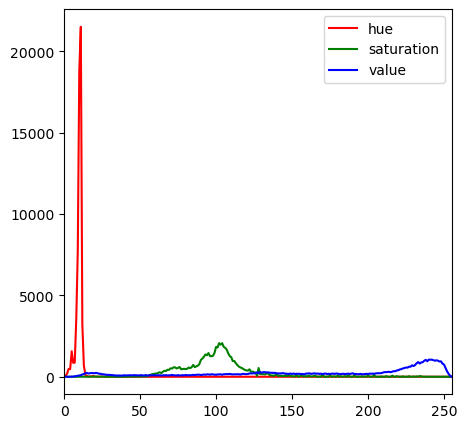

In [91]:
# Size of the histogram
fig = plt.figure(figsize=(5,5))

# Plot the hue.
hist = cv2.calcHist([hsvImg],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([hsvImg],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([hsvImg],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

#plotting the graph of hue, saturation and value.
plt.legend(('hue', 'saturation', 'value'), loc = 'upper right')
plt.show()

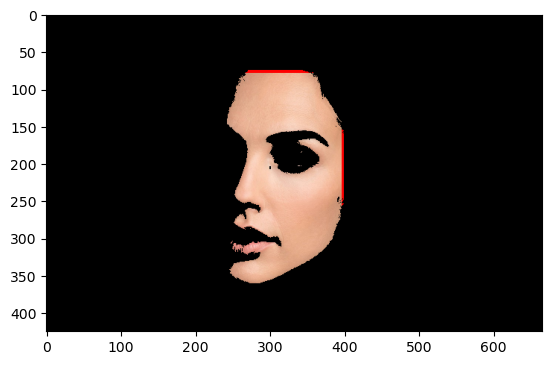

In [92]:
# Minimum and maximum HSV values.
min_hsv = np.array([0,50,200], np.uint8)
max_hsv = np.array([30,120,255], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(hsvImg, min_hsv, max_hsv)

# Bitwise And mask
skinHsv = cv2.bitwise_and(img_masked, img_masked, mask = skinArea)

#plotting skinHsv
plt.imshow(skinHsv)